In [1]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import numpy as np
import pandas as pd
from sklearn.cluster import MeanShift, KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression
from sklearn import model_selection
import math

In [2]:
gini_df = pd.read_csv(r"E:\Python-Notebooks\big_data_challenge\datasets_bdc\gini_index.csv")
employment_df = pd.read_csv(r"E:\Python-Notebooks\big_data_challenge\datasets_bdc\employment_per_country.csv")
code_csv = pd.read_csv(r"E:\Python-Notebooks\big_data_challenge\datasets_bdc\wikipedia-iso-country-codes.csv")
print(gini_df.columns)

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020'],
      dtype='object')


In [3]:
code_dict = {}

for i in range(len(code_csv)):
    country = code_csv.loc[i, 'English short name lower case']
    code = code_csv.loc[i, 'Alpha-3 code']
    code_dict[code] = country

In [4]:
def get_employment_category(country, technology):
    for i in range(len(employment_df)):
        country_at = employment_df.loc[i, 'country']
        tech_at = employment_df.loc[i, 'technology']
        if country == country_at and tech_at == technology:
            if employment_df.loc[i, 'jobs (thousands)'] is np.nan:
                return 0.0
            return float(employment_df.loc[i, 'jobs (thousands)'])
        
    return 0.0

In [5]:
print(get_employment_category('Albania', 'All technologies'))

12.322


In [6]:
def found_country(arr, country):
    for i in arr:
        if i == country:
            return True
    return False

In [7]:
def getUniqueValues(arr):
    track = set()
    for i in arr:
        track.add(i)
    return track

In [8]:
df_map = {'Country code':[], 'Latest GINI':[]}
tech_sectors = getUniqueValues(employment_df['technology'])
for t in tech_sectors:
    df_map[t] = []
print(df_map)

{'Country code': [], 'Latest GINI': [], 'Liquid Biofuels': [], 'Solar Photovoltaic': [], 'Tide, Wave and Ocean Energy': [], 'CSP': [], 'Solar Heating / Cooling': [], 'All technologies': [], 'Others': [], 'Solid Biomass': [], 'Wind Energy': [], 'Geothermal Energy': [], 'Hydropower': [], 'Biogas': [], 'Municipal and industrial waste': []}


In [9]:
count = 0
for i in range(len(gini_df)):
    country_code = gini_df.loc[i, 'Country Code']
    if country_code in code_dict:
        val = get_employment_category(code_dict[country_code], 'All technologies')
        print(val,' ', country_code)
        if val > 0:
            count += 1
    else:
        print('not ',country_code)
        
    for t in tech_sectors:
        if country_code in code_dict:
            #print('in ',country_code)
            val = get_employment_category(code_dict[country_code], t)
            df_map[t].append(val)
        else:
            #print('not ', country_code)
            df_map[t].append(np.nan)
    
    df_map['Country code'].append(country_code)
    added = False
    for j in range(2020, 1960, -1):
        #print(gini_df.loc[i, str(j)])
        if not math.isnan(gini_df.loc[i, str(j)]):   
            #print('here')
            df_map['Latest GINI'].append(gini_df.loc[i, str(j)])
            added = True
            break
    if not added:
        df_map['Latest GINI'].append(np.nan)

print(count)

0.0   ABW
not  AFE
0.0   AFG
not  AFW
3.514   AGO
12.322   ALB
0.0   AND
not  ARB
7.75   ARE
29.413   ARG
0.0   ARM
0.0   ASM
0.0   ATG
67.788   AUS
30.546   AUT
3.441   AZE
0.0   BDI
22.574   BEL
0.0   BEN
0.1   BFA
127.6   BGD
43.719   BGR
0.0   BHR
0.0   BHS
nan   BIH
0.34   BLR
0.0   BLZ
0.0   BMU
0.0   BOL
1202.224   BRA
0.14   BRB
0.0   BRN
0.0   BTN
0.1   BWA
0.0   CAF
79.87   CAN
not  CEB
13.946   CHE
not  CHI
27.422   CHL
4731.574   CHN
0.0   CIV
0.0   CMR
0.0   COD
8.342   COG
266.306   COL
0.0   COM
0.0   CPV
1.344   CRI
not  CSS
0.0   CUB
not  CUW
0.0   CYM
1.94   CYP
33.933   CZE
296.784   DEU
0.0   DJI
0.0   DMA
45.925   DNK
0.3   DOM
2.348   DZA
not  EAP
not  EAR
not  EAS
not  ECA
not  ECS
10.66   ECU
3.92   EGY
not  EMU
0.0   ERI
97.978   ESP
14.268   EST
34.958   ETH
not  EUU
not  FCS
35.752   FIN
0.0   FJI
110.151   FRA
0.0   FRO
0.0   FSM
0.093   GAB
124.434   GBR
0.0   GEO
16.249   GHA
0.0   GIB
1.0   GIN
0.0   GMB
0.0   GNB
0.0   GNQ
31.433   GRC
0.0   GRD
0.0   GR

In [10]:
print(len(df_map['Country code']))
print(len(df_map['Latest GINI']))
print(len(df_map['All technologies']))

266
266
266


In [19]:
mod_df = {}
for t in tech_sectors:
    mod_df[t] = pd.DataFrame({'Country code':df_map['Country code'], 'Latest GINI': df_map['Latest GINI'], t: 
                       df_map[t]})
    mod_df[t].dropna(inplace=True)
    mod_df[t].reset_index(inplace=True)

In [11]:
#mod_df_all = pd.DataFrame({'Country code':df_map['Country code'], 'Latest GINI': df_map['Latest GINI'], 'Total': 
 #                      df_map['All technologies']})
#mod_df_all.dropna(inplace=True)
#mod_df_all.reset_index(inplace=True)
#mod_df_all

,index,Country code,Latest GINI,Total
0,4,AGO,51.3,3.514
1,5,ALB,33.2,12.322
2,8,ARE,26.0,7.750
3,9,ARG,42.9,29.413
4,10,ARM,29.9,0.000
...,...,...,...,...
159,260,WSM,38.7,0.000
160,262,YEM,36.7,0.000
161,263,ZAF,63.0,53.990
162,264,ZMB,57.1,13.172


In [12]:
x = mod_df_all['Latest GINI']
y = mod_df_all['Total']
X = mod_df_all.drop(['Country code', 'index'],1)

In [13]:
def add_restricts(limit):
    x = []
    y = []
    
    for i in range(len(mod_df_all)):
        #print(mod_df_all.loc[i, 'Total'])
        if float(mod_df_all.loc[i, 'Total']) < limit:
            x.append(mod_df_all.loc[i, 'Latest GINI'])
            y.append(mod_df_all.loc[i, 'Total'])
    return [x,y]

In [23]:
ms = MeanShift()
ms.fit(X)
print(ms.cluster_centers_)

[[ 38.21368421   1.7018    ]
 [ 53.4        871.        ]
 [ 51.3        193.926     ]
 [ 41.4        271.11      ]
 [ 38.2        475.6       ]
 [ 34.9        138.6       ]]


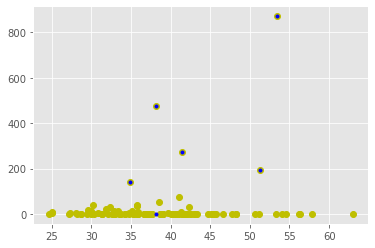

In [24]:
plt.plot(x, y, 'yo')

for val in ms.cluster_centers_:
    plt.plot(val[0], val[1], 'bo', ms=3)

plt.show()

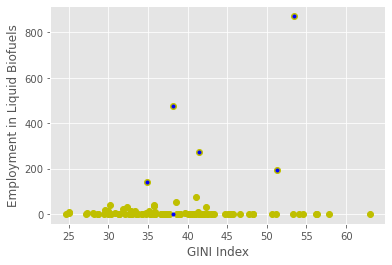

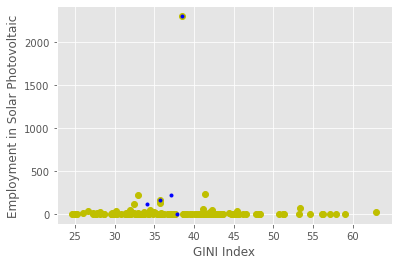

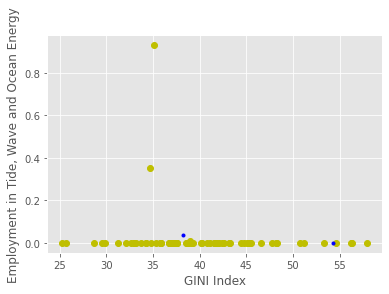

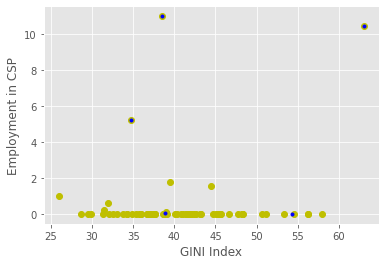

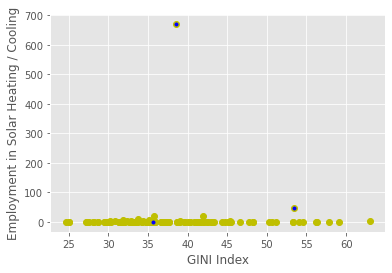

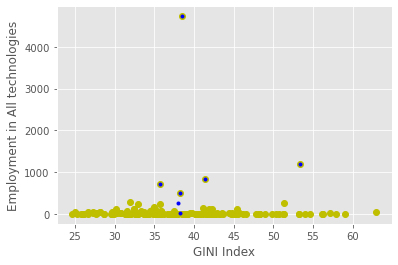

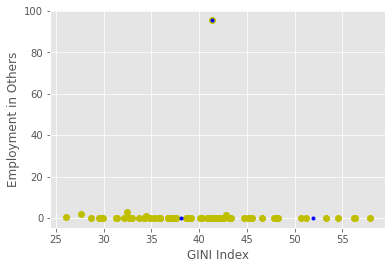

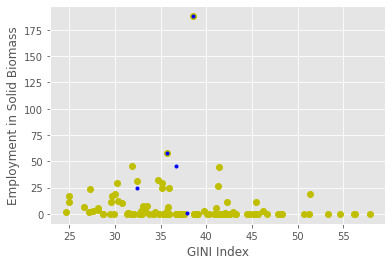

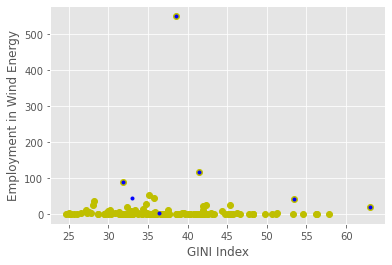

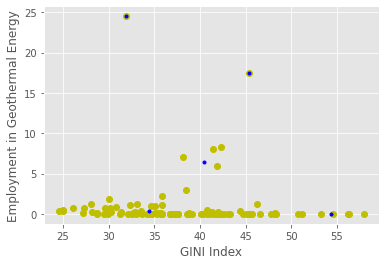

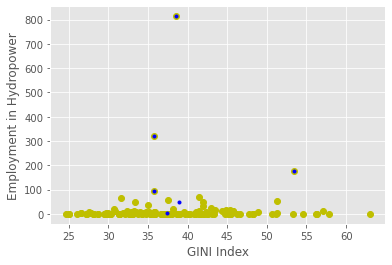

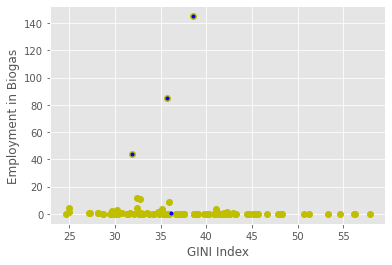

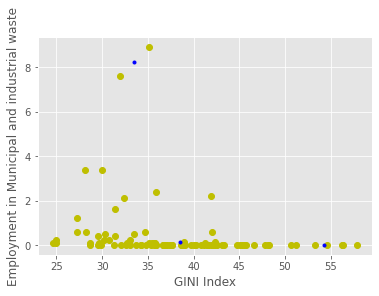

In [27]:
for t in tech_sectors:
    x = mod_df[t]['Latest GINI']
    y = mod_df[t][t]
    X = mod_df[t].drop(['Country code', 'index'], 1)
    ms = MeanShift()
    ms.fit(X)
    
    plt.plot(x,y,'yo')
    
    for val in ms.cluster_centers_:
        plt.plot(val[0], val[1], 'bo', ms=3)
        
    plt.xlabel('GINI Index')
    plt.ylabel('Employment in '+t)
    plt.show()